# [MICRO-452:] Project Report - Groupe 28
**Authors:** Celest Angela Tjong, Adrien Louis Baptiste Dupont, Luca Sidoti Pinto, Didier Henri Neuenschwander
**Supervisors:** Prof. Francesco Mondada
Date: 17 Novembre 2023

[MICRO-452]: **to be changed**

<span style="color:red; font-size:40px;">use as few personal pronouns as possible (we, our, etc.
)

# Table of Contents
* [1. Introduction](#introduction)
* [2. Vision](#vision)
    * [2.1. Subsection 1](#vision-subsection-1)
    * [2.2. Subsection 2](#vision-subsection-2)
* [3. Global Navigation](#global-navigation)
* [4. Filtering](#filtering)
* [5. Local Navigation](#local-navigation)
* [6. Conclusion](#conclusion)
lusion)
clusion)
usion)


## 1 Introduction
<a id="introduction"></a>

## 2 Vision
<a id="vision"></a>
https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

### Vision Subsection 1
<a id="Vision-subsection-1"></a>
**Ask to TA if we have to describe every function used in the notebook?**






In [166]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a function to detect circles of a specific color
def detect_color_circle(image, lower_color_bound, upper_color_bound):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the specified color
    mask = cv2.inRange(hsv, lower_color_bound, upper_color_bound)

    # Apply the mask to the original image
    color_only = cv2.bitwise_and(image, image, mask=mask)

    # Convert to grayscale for circle detection
    gray = cv2.cvtColor(color_only, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection to help with circle detection
    edges = cv2.Canny(gray, 100, 200)

    # Use Hough Transform to detect circles
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=20, minRadius=30, maxRadius=0)
    
    # If circles are detected, return the list of circles with x, y coordinates and radius
    if circles is not None:
        # Convert the (1, N, 3) array to (N, 3)
        circles = np.uint16(np.around(circles[0, :]))          
        return [(circle[0], circle[1], circle[2]) for circle in circles]
    else:
        return "No circle of the specified color detected."
    
            




In [167]:
# Load the image from the provided path
image_path = 'WIN_20231119_11_31_09_Pro.jpg'
image = cv2.imread(image_path)


# Define color thresholds for red and green in HSV
# Note: these thresholds may need to be adjusted for your specific image conditions
lower_red = np.array([120, 70, 120])
upper_red = np.array([255, 255, 255])
lower_green = np.array([60, 120, 100])
upper_green = np.array([100, 255, 255])
lower_yellow = np.array([10, 40, 190])
upper_yellow = np.array([47, 105, 255])

# Detect red and green circles
red_circles = detect_color_circle(image, lower_red, upper_red)
green_circles = detect_color_circle(image, lower_green, upper_green)
yellow_circles = detect_color_circle(image, lower_yellow, upper_yellow)

red_circles, green_circles, yellow_circles

([(650, 590, 42), (776, 510, 44)], [(666, 488, 42)])

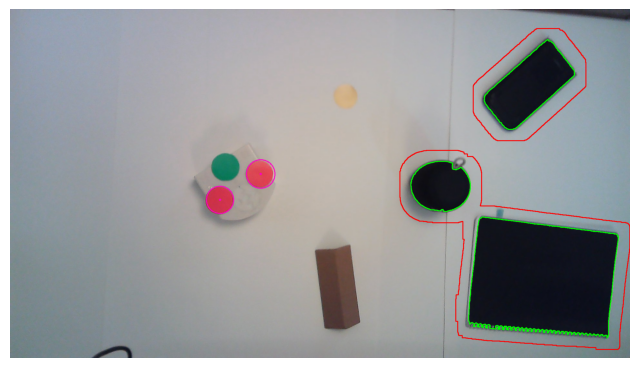

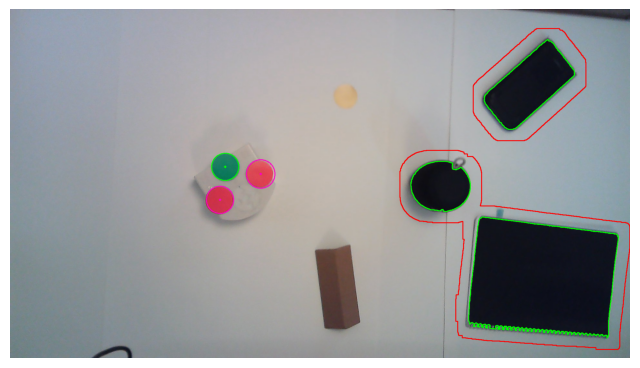

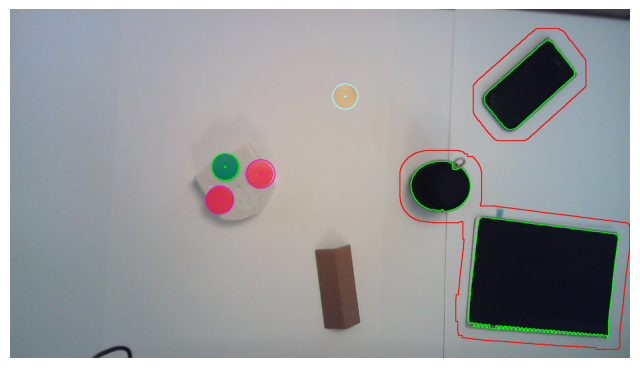

In [176]:
def plot_detected_circles(image, circles, circle_color):
    """
    Draws the detected circles on the image and plots it.

    :param image: The original image.
    :param circles: A list of circles with their coordinates and radius.
    :param circle_color: The color to use for drawing the circles.
    :return: None
    """
    if circles is not None and len(circles) > 0:
        for circle in circles:
            center = (circle[0], circle[1])  # Circle center
            radius = circle[2]  # Circle radius
            # Draw the circle's perimeter
            cv2.circle(image, center, radius, circle_color, 2)
            # Draw the circle's center
            cv2.circle(image, center, 2, circle_color, 3)

    # Plot the image with detected circles
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()

# Assuming red_circles and green_circles contain the detected circles for each color
image_copy = image.copy()  # Make a copy to draw on
plot_detected_circles(image_copy, red_circles, (200, 0, 255))  # Red color for red circles
plot_detected_circles(image_copy, green_circles, (0, 255, 0))  # Green color for green circles
plot_detected_circles(image_copy, yellow_circles,(255,255,153))  # yellow color for yellow circles


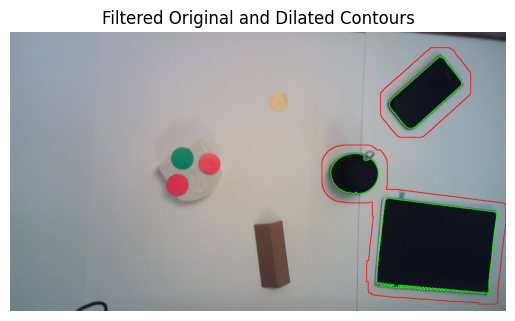

In [175]:

image_path = 'WIN_20231119_11_31_09_Pro.jpg'
image = cv2.imread(image_path)

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the black color
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

# Create a black color mask
mask_black = cv2.inRange(hsv, lower_black, upper_black)

# Find contours in the mask
contours, _ = cv2.findContours(mask_black, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Set a realistic threshold for the area of the contours
area_threshold = 20000  # Adjust this threshold according to your needs

# Filter the original contours that are larger than the threshold
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > area_threshold]

# Perform dilation to increase the size of the black regions
kernel_size = 70  # Kernel size can be adjusted to control the amount of dilation
kernel = np.ones((kernel_size, kernel_size), np.uint8)
mask_dilated = cv2.dilate(mask_black, kernel, iterations=1)

# Find contours in the dilated mask
dilated_contours, _ = cv2.findContours(mask_dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter the dilated contours that are larger than the threshold
filtered_dilated_contours = [cnt for cnt in dilated_contours if cv2.contourArea(cnt) > area_threshold]

# Draw the filtered original contours in green
for contour in filtered_contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Draw the filtered dilated contours in red
for contour in filtered_dilated_contours:
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)

# Display the image with the drawn contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Original and Dilated Contours')
plt.axis('off')  # Hide the axis
plt.show()


# Tool functions that help with parameter tuning:
<a id="Vision-subsection-2"></a>


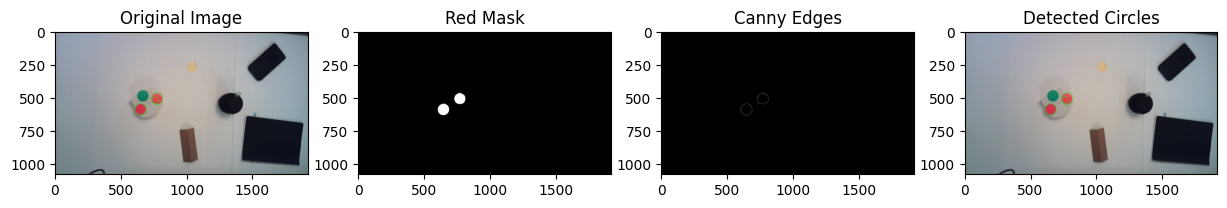

In [153]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('WIN_20231119_11_31_09_Pro.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the red color
# Note: Adjust these values according to your color calibration


# Create a red color mask
mask_red = cv2.inRange(hsv, lower_red, upper_red)

# Apply the mask to the image
red_only = cv2.bitwise_and(image, image, mask=mask_red)

# Convert the result to grayscale
gray = cv2.cvtColor(red_only, cv2.COLOR_BGR2GRAY)


# Apply Canny edge detection to help with circle detection
edges = cv2.Canny(gray, 100, 340)

# Detect circles using the Hough Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=20, minRadius=0, maxRadius=0)

# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Plotting the different stages
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(mask_red, cmap='gray')
plt.title('Red Mask')

plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')

plt.show()

In [154]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interactive

def interactive_mask(lower_h, lower_s, lower_v, upper_h, upper_s, upper_v):
    lower_color_bound = np.array([lower_h, lower_s, lower_v])
    upper_color_bound = np.array([upper_h, upper_s, upper_v])
    
    mask = cv2.inRange(hsv, lower_color_bound, upper_color_bound)
    plt.imshow(mask, cmap='gray')
    plt.show()

# Assuming 'hsv' is your converted HSV image
interactive(interactive_mask, lower_h=(0,255), lower_s=(0,255), lower_v=(0,255),
            upper_h=(0,255), upper_s=(0,255), upper_v=(0,255))


interactive(children=(IntSlider(value=127, description='lower_h', max=255), IntSlider(value=127, description='…

## 3 Global Navigation
<a id="global-navigation"></a>

## 4 Filtering
<a id="filtering"></a>

## 5 Local Navigation
<a id="local-navigation"></a>

## 6 Conclusion
<a id="conclusion"></a>